# Exploring the Dynamics of Drug Pricing: An Inference Analysis #
I aim to uncover patterns and insights into what influences the prices of drugs. This project not only seeks to provide a clearer understanding of the pharmaceutical market dynamics but also to assist in making informed decisions for consumers and healthcare stakeholders.

In [1]:
import pandas as pd

data = pd.read_csv('Drug_clean.csv')
data.head()

,Condition,Drug,EaseOfUse,Effective,Form,Indication,Price,Reviews,Satisfaction,Type
0,Acute Bacterial Sinusitis,Amoxicillin,3.852353,3.655882,Capsule,On Label,12.590000,86.294118,3.197647,RX
1,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.470000,3.290000,Liquid (Drink),Off Label,287.370000,43.000000,2.590000,RX
2,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.121429,2.962857,Tablet,On Label,70.608571,267.285714,2.248571,RX
3,Acute Bacterial Sinusitis,Ampicillin,2.000000,3.000000,Capsule,On Label,12.590000,1.000000,1.000000,RX
4,Acute Bacterial Sinusitis,Ampicillin,3.250000,3.000000,Tablet,On Label,125.240000,15.000000,3.000000,RX


 ## Data Loading and Exploration:

In [2]:
# Step 1: Exploring the data

info = data.info()
desc_stats = data.describe()
missing_values = data.isnull().sum()
full_duplicates = data[data.duplicated(keep=False)]
info, desc_stats, missing_values, full_duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Condition     685 non-null    object 
 1   Drug          685 non-null    object 
 2   EaseOfUse     685 non-null    float64
 3   Effective     685 non-null    float64
 4   Form          685 non-null    object 
 5   Indication    685 non-null    object 
 6   Price         685 non-null    float64
 7   Reviews       685 non-null    float64
 8   Satisfaction  685 non-null    float64
 9   Type          685 non-null    object 
dtypes: float64(5), object(5)
memory usage: 53.6+ KB


(None,
         EaseOfUse   Effective         Price      Reviews  Satisfaction
 count  685.000000  685.000000    685.000000   685.000000    685.000000
 mean     3.920038    3.523530    174.211183    82.644410      3.195699
 std      0.894212    0.954126    667.743466   273.281398      1.030442
 min      1.000000    1.000000      4.000000     1.000000      1.000000
 25%      3.556667    3.000000     15.490000     3.000000      2.575000
 50%      4.050000    3.600000     49.990000    10.350877      3.200000
 75%      4.500000    4.110000    145.990000    57.000000      3.901250
 max      5.000000    5.000000  10362.190000  4647.000000      5.000000,
 Condition       0
 Drug            0
 EaseOfUse       0
 Effective       0
 Form            0
 Indication      0
 Price           0
 Reviews         0
 Satisfaction    0
 Type            0
 dtype: int64,
 Empty DataFrame
 Columns: [Condition, Drug, EaseOfUse, Effective, Form, Indication, Price, Reviews, Satisfaction, Type]
 Index: [])

## Unique Value Extraction:

In [3]:
unique_counts = data.nunique()
print(unique_counts)

# Extracting unique values for 'Type', 'Form', and 'Indication' columns
unique_types = data['Type'].unique()
unique_forms = data['Form'].unique()
unique_indications = data['Indication'].unique()

unique_types, unique_forms, unique_indications

Condition        37
Drug            470
EaseOfUse       296
Effective       311
Form              6
Indication        3
Price           332
Reviews         292
Satisfaction    312
Type              4
dtype: int64


(array(['RX', 'OTC', 'RX/OTC', '\r\r\n'], dtype=object),
 array(['Capsule', 'Liquid (Drink)', 'Tablet', 'Cream', 'Liquid (Inject)',
        'Other'], dtype=object),
 array(['On Label', 'Off Label', '\r\r\n'], dtype=object))

In [4]:
# Dropping rows where 'Type' or 'Indication' has '\r\r\n'
data = data[(data['Type'] != '\r\r\n') & (data['Indication'] != '\r\r\n')]
data.shape

(672, 10)

## Encoding:
Applied one-hot encoding for 'Form', 'Indication', and 'Type', and label encoding for 'Drug' and 'Condition'.

In [5]:
print(data[['Condition', 'Drug', 'Form', 'Indication', 'Type']].describe())

           Condition             Drug    Form Indication Type
count            672              672     672        672  672
unique            37              461       6          2    3
top     hypertension  Naproxen Sodium  Tablet   On Label   RX
freq             101                7     299        543  481


In [6]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Initializing encoders
one_hot_encoder = OneHotEncoder()
drug_label_encoder = LabelEncoder()
condition_label_encoder = LabelEncoder()

# One-hot encoding for 'Form', 'Indication', and 'Type'
one_hot_encoded = pd.get_dummies(data[['Form', 'Indication', 'Type']], drop_first=True)

# Label encoding for 'Drug' and 'Condition'
data['Drug_encoded'] = drug_label_encoder.fit_transform(data['Drug'])
data['Condition_encoded'] = condition_label_encoder.fit_transform(data['Condition'])

# Combining the encoded features with the original dataframe
encoded_data = pd.concat([data, one_hot_encoded], axis=1)

# Dropping the original categorical columns
encoded_data.drop(['Form', 'Indication', 'Type', 'Drug', 'Condition'], axis=1, inplace=True)

# Displaying the new dataframe
encoded_data.head()

,EaseOfUse,Effective,Price,Reviews,Satisfaction,Drug_encoded,Condition_encoded,Form_Cream,Form_Liquid (Drink),Form_Liquid (Inject),Form_Other,Form_Tablet,Indication_On Label,Type_RX,Type_RX/OTC
0,3.852353,3.655882,12.590000,86.294118,3.197647,41,0,False,False,False,False,False,True,True,False
1,3.470000,3.290000,287.370000,43.000000,2.590000,42,0,False,True,False,False,False,False,True,False
2,3.121429,2.962857,70.608571,267.285714,2.248571,42,0,False,False,False,False,True,True,True,False
3,2.000000,3.000000,12.590000,1.000000,1.000000,43,0,False,False,False,False,False,True,True,False
4,3.250000,3.000000,125.240000,15.000000,3.000000,43,0,False,False,False,False,True,True,True,False


In [7]:
encoded_value = 41  # Example encoded value for 'Drug'
original_drug_name = drug_label_encoder.inverse_transform([encoded_value])
original_drug_name

array(['Amoxicillin'], dtype=object)

## Initial Visualizations:

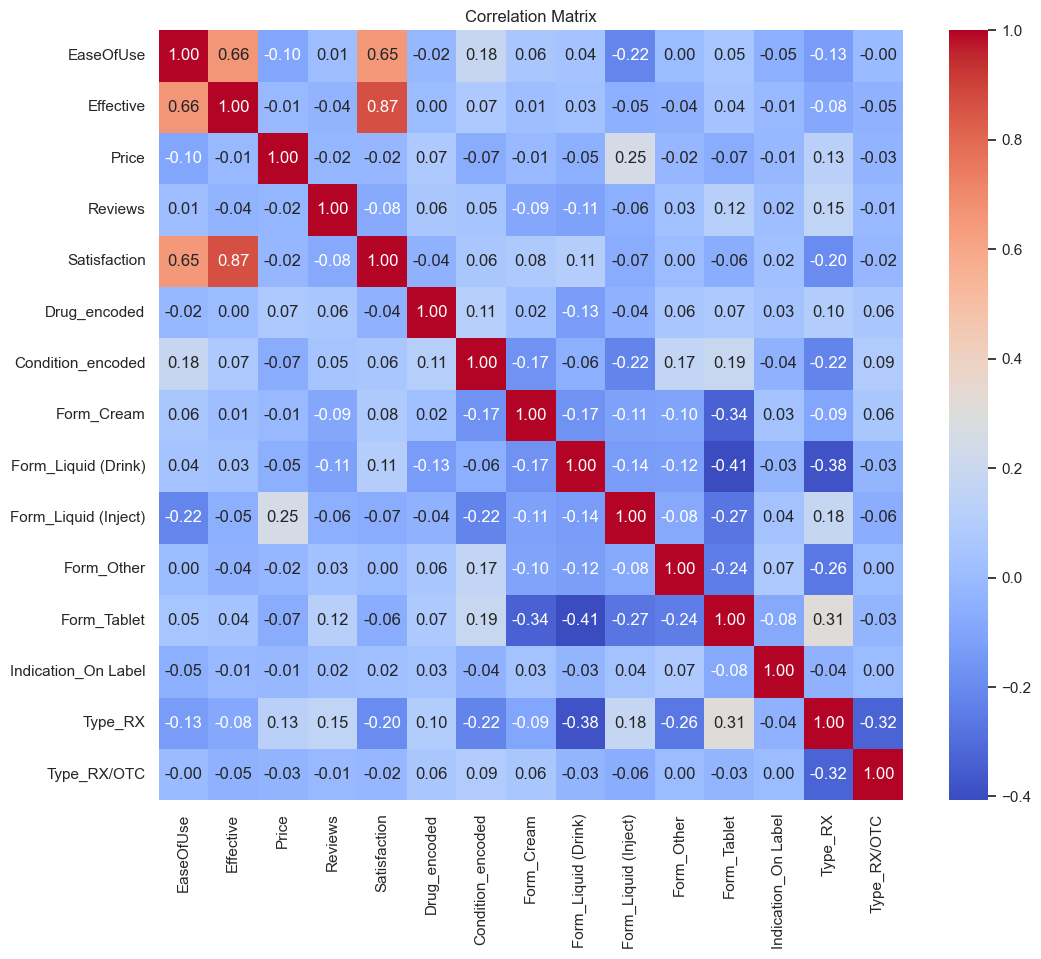

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the plot style
sns.set(style="whitegrid")

# Calculating the correlation matrix
corr_matrix = encoded_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

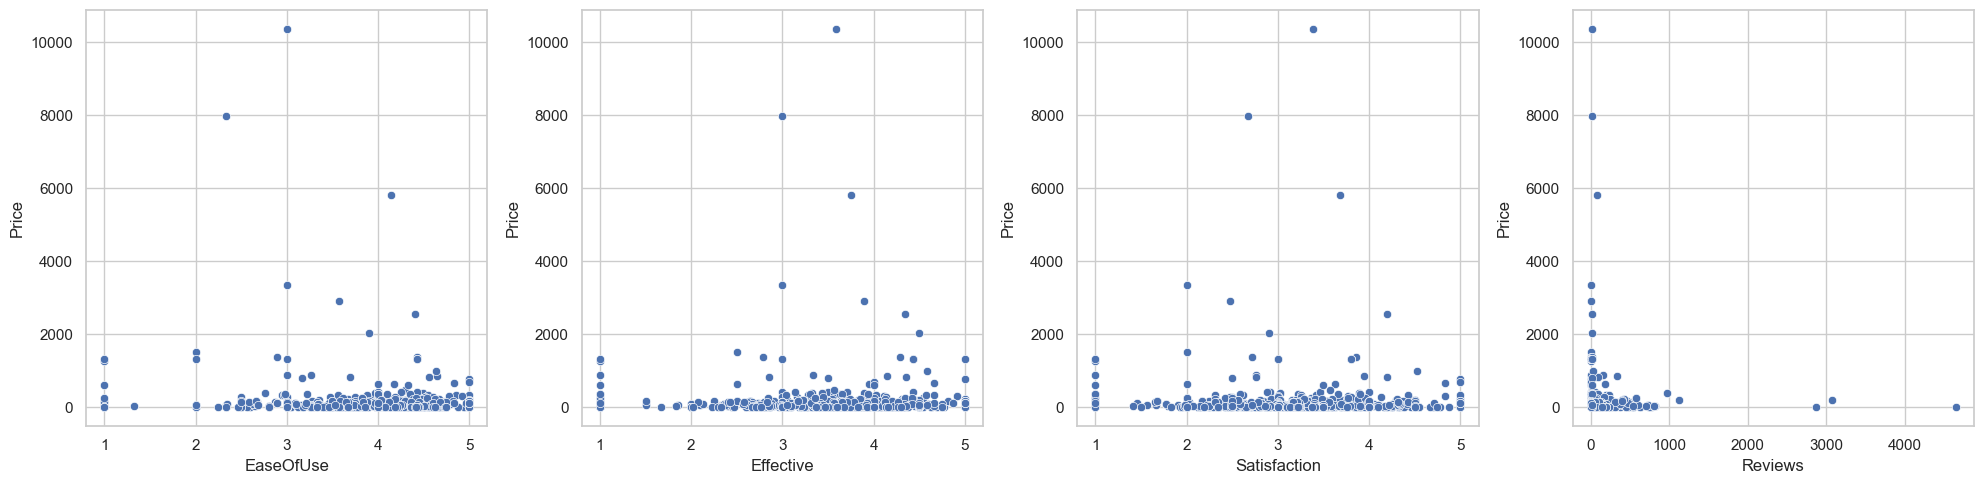

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Price vs EaseOfUse, Effective, Satisfaction, Reviews
plt.figure(figsize=(20, 5))

# Relationship with EaseOfUse
plt.subplot(1, 4, 1)
sns.scatterplot(x='EaseOfUse', y='Price', data=data)

# Relationship with Effective
plt.subplot(1, 4, 2)
sns.scatterplot(x='Effective', y='Price', data=data)

# Relationship with Satisfaction
plt.subplot(1, 4, 3)
sns.scatterplot(x='Satisfaction', y='Price', data=data)

# Relationship with Reviews
plt.subplot(1, 4, 4)
sns.scatterplot(x='Reviews', y='Price', data=encoded_data)

plt.tight_layout()
plt.show()

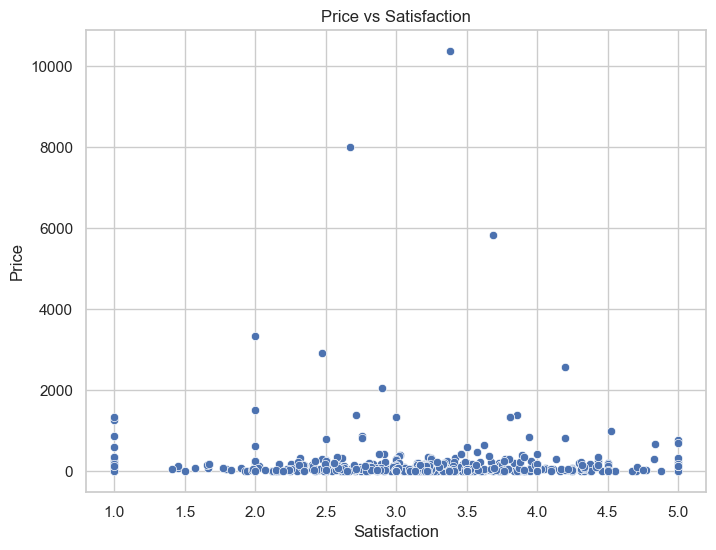

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Satisfaction', y='Price', data=encoded_data)
plt.title('Price vs Satisfaction')
plt.show()

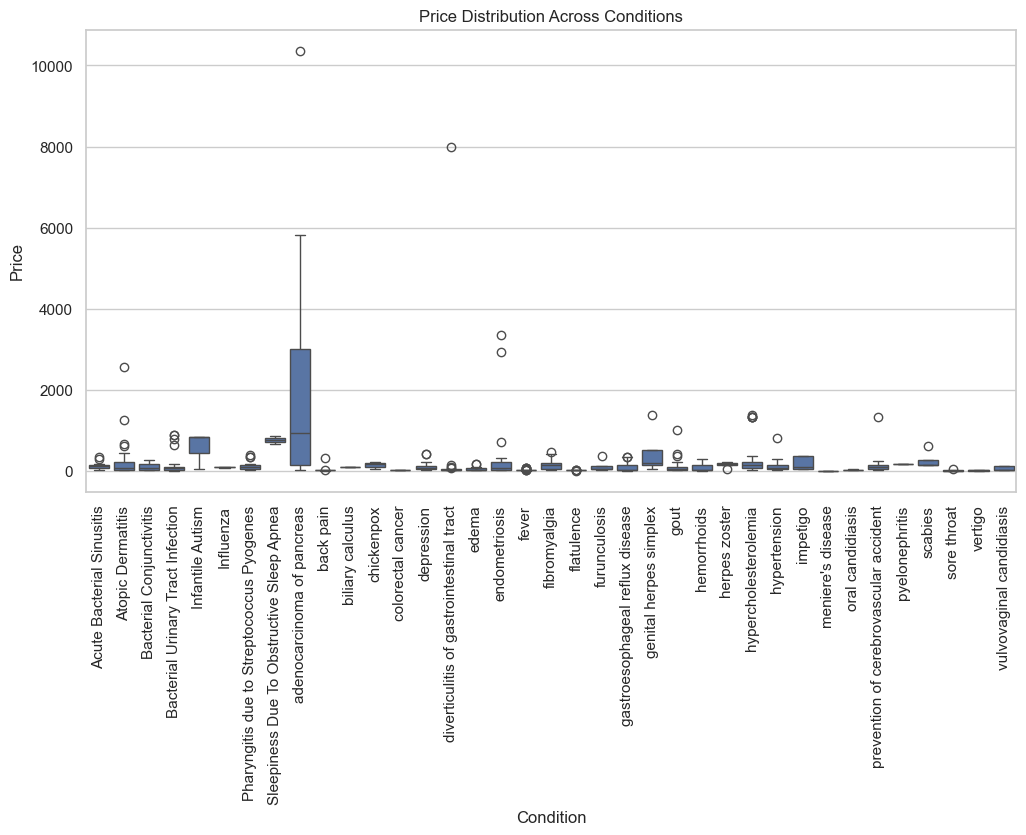

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Condition', y='Price', data=data)
plt.title('Price Distribution Across Conditions')
plt.xticks(rotation=90)
plt.show()

## Removing Outliers:
Outliers have been removed from 'Price' variable.
New dataframe: **data_no_outliers**

In [12]:
# Calculate Q1, Q3 and IQR
Q1 = encoded_data['Price'].quantile(0.25)
Q3 = encoded_data['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers = encoded_data[(encoded_data['Price'] >= lower_bound) & (encoded_data['Price'] <= upper_bound)]

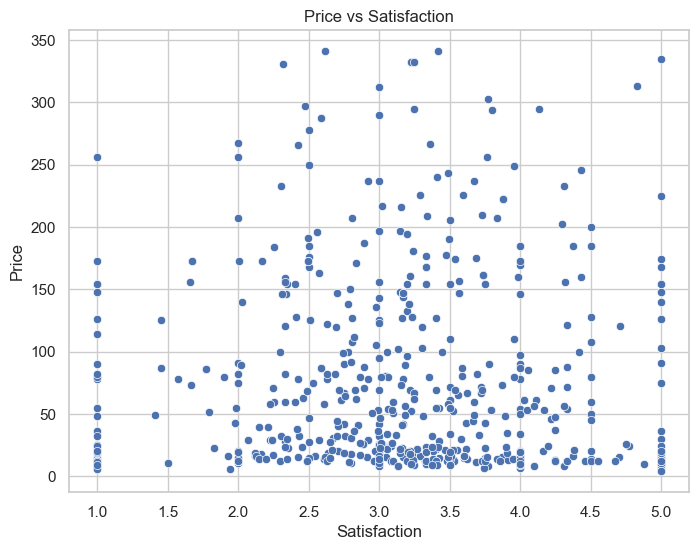

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Satisfaction', y='Price', data=data_no_outliers)
plt.title('Price vs Satisfaction')
plt.show()

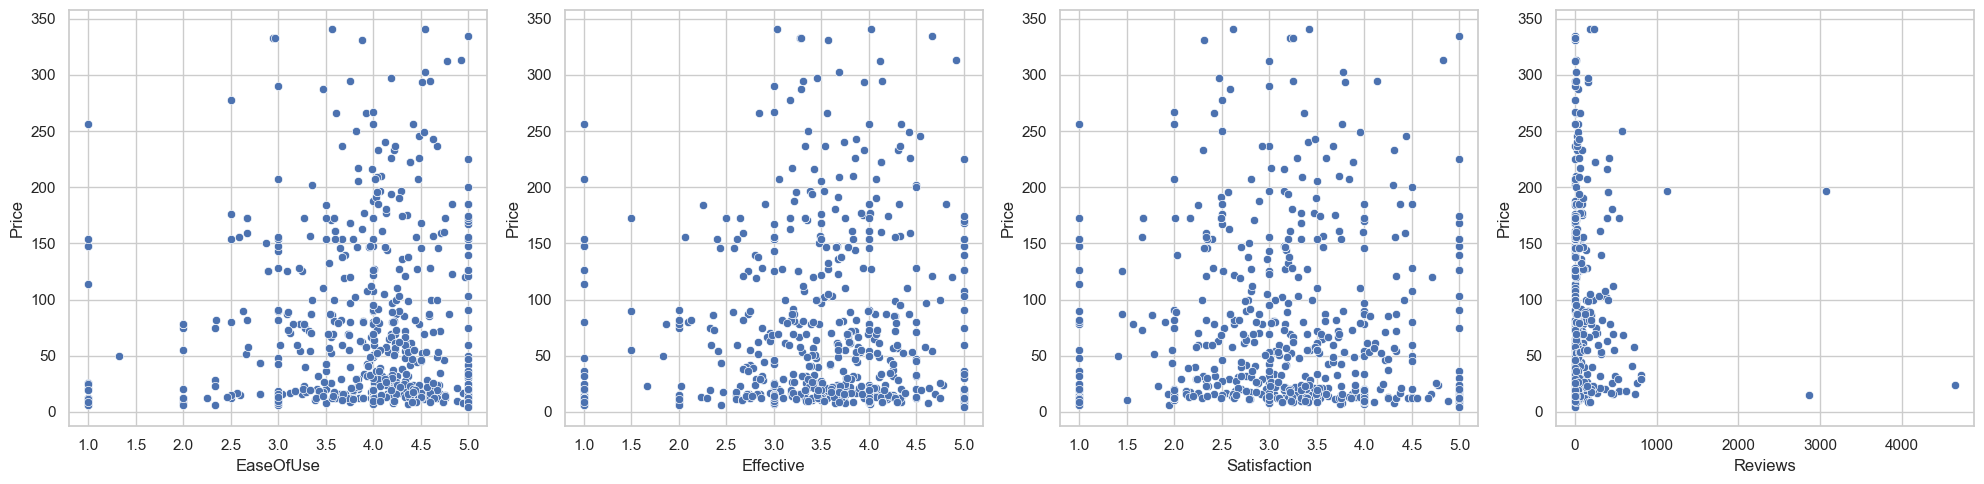

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Price vs EaseOfUse, Effective, Satisfaction, Reviews
plt.figure(figsize=(20, 5))

# Relationship with EaseOfUse
plt.subplot(1, 4, 1)
sns.scatterplot(x='EaseOfUse', y='Price', data=data_no_outliers)

# Relationship with Effective
plt.subplot(1, 4, 2)
sns.scatterplot(x='Effective', y='Price', data=data_no_outliers)

# Relationship with Satisfaction
plt.subplot(1, 4, 3)
sns.scatterplot(x='Satisfaction', y='Price', data=data_no_outliers)

# Relationship with Reviews
plt.subplot(1, 4, 4)
sns.scatterplot(x='Reviews', y='Price', data=data_no_outliers)

plt.tight_layout()
plt.show()

## Initial Statsmodel:
Statsmodels after removing 'Price' outliers.
Begin by building a simple linear regression model with statsmodels using 'EaseOfUse', 'Effective', 'Reviews', and 'Satisfaction' as predictors for the 'Price'.

In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula1 = "Price ~ EaseOfUse+Effective+Reviews+Satisfaction"
model1 = ols(formula= formula1, data=data_no_outliers).fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.925
Date:                Wed, 20 Dec 2023   Prob (F-statistic):              0.105
Time:                        13:56:59   Log-Likelihood:                -3596.8
No. Observations:                 626   AIC:                             7204.
Df Residuals:                     621   BIC:                             7226.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       72.0496     14.420      4.997      0.000      43.732     100.367
EaseOfUse       -3.1590      4.699     -0.672      0.502     -12.387       6.069
Effective       16.4496      6.722      2.447      0.015       3.250      29.650
Reviews          0.0080      0.011      0.738      0.461      -0.013       0.029
Satisfaction   -13.9978      6.020     -2.325      0.020     -25.819      -2.176
==============================================================================
Omnibus:                      141.784   Durbin-Watson:                   1.429
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.468
Skew:                           1.382   Prob(JB):                     1.83e-54
Kurtosis:                       4.358   Cond. No.                     1.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

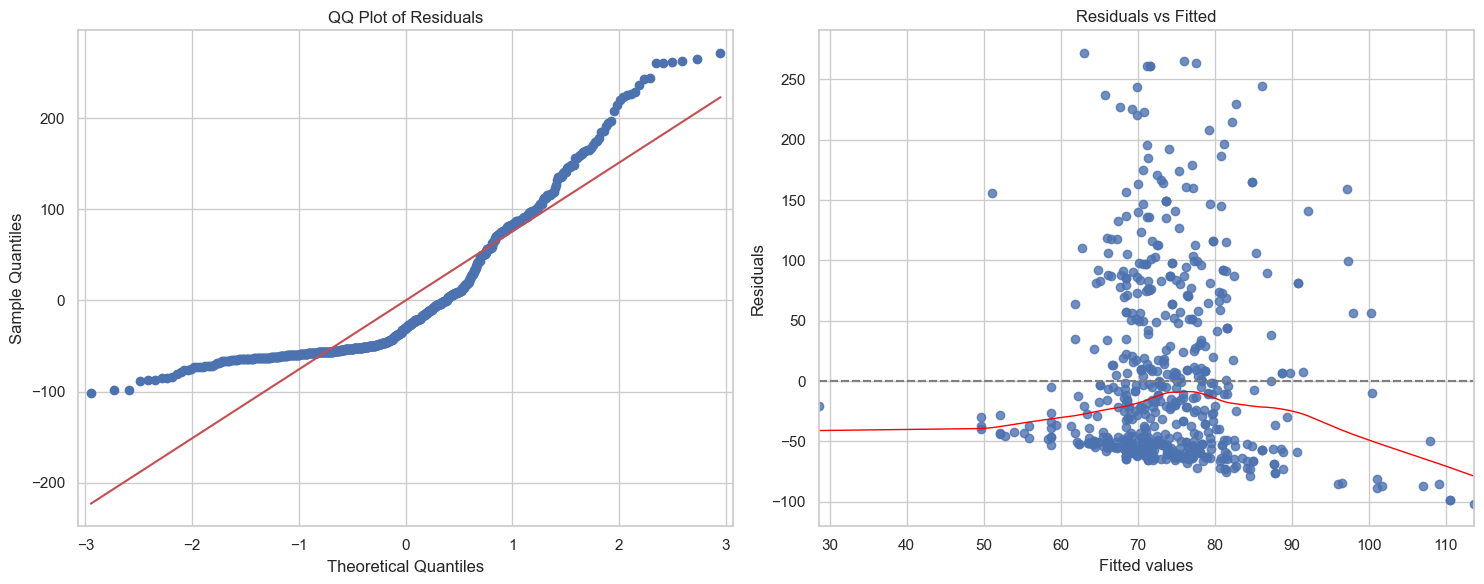

In [16]:
# Creating a QQ plot to check the normality of residuals
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sm.qqplot(model1.resid, line='s', ax=ax[0])
ax[0].set_title('QQ Plot of Residuals')

# Residuals vs Fitted values plot to check homoscedasticity
sns.residplot(x=model1.fittedvalues, y=model1.resid, lowess=True, ax=ax[1], line_kws={'color': 'red', 'lw': 1})
ax[1].set_title('Residuals vs Fitted')
ax[1].set_xlabel('Fitted values')
ax[1].set_ylabel('Residuals')

# Plotting the homoscedasticity trend line
ax[1].axhline(y=0, color='grey', linestyle='dashed')

plt.tight_layout()
plt.show()

## Interpreting OLS results in the context of inferential analysis:

We are modeling for inference with the primary goal of understanding the relationships between the dependent variable and the independent variables, the focus is less on the R-squared values and more on the statistical significance of the individual predictors, the signs of their coefficients, and the confidence intervals around those estimates.

1. **Adjusted R-squared**: The Adjusted R-squared in the model is quite low (0.006), which would generally be considered poor for predictive modeling, but it is not the key metric for inference. It indicates that the model doesn't explain much of the variance in the dependent variable.The goal is to understand the direction and significance of effects, therefore it's not as critical.

2. **Coefficient Significance**: 'Effective' has a p-value of 0.015, which is below the typical alpha level of 0.05, suggesting it is statistically significant. 'Satisfaction' also appears to be a significant predictor with a p-value of 0.020. The coefficients for 'EaseOfUse' and 'Reviews' are not statistically significant since their p-values are above 0.05.

3. **Coefficient Size**: The negative coefficient for 'Satisfaction' suggests that as satisfaction increases, the price tends to decrease, holding all other factors constant. This is an interesting result and we can use it for further investigation.

4. **Model Diagnostics**: The Omnibus test p-value is very low, which suggests the residuals are not normally distributed. Also, the Condition Number is high, indicating potential multicollinearity issues.

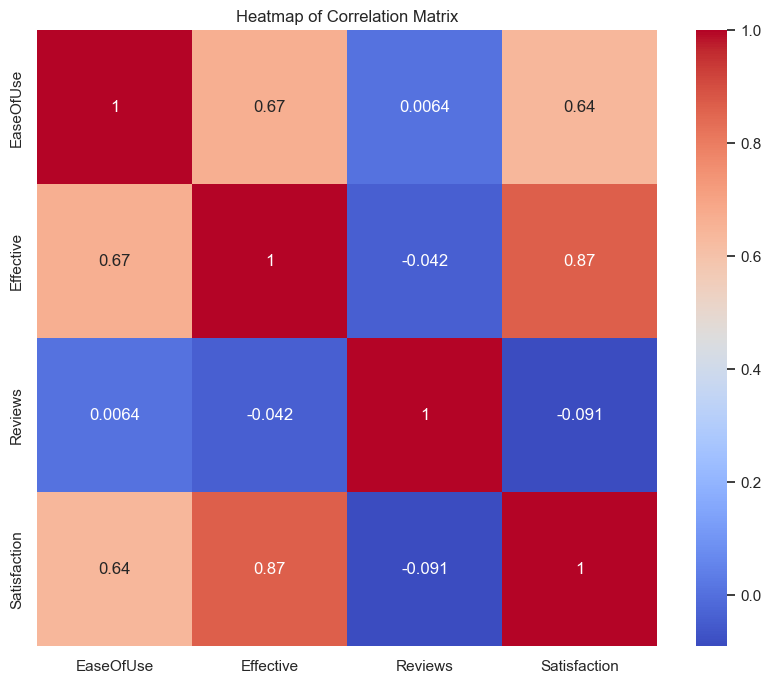

In [17]:
corr_matrix = data_no_outliers[['EaseOfUse', 'Effective', 'Reviews', 'Satisfaction']].corr()

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

## Log Transformation:

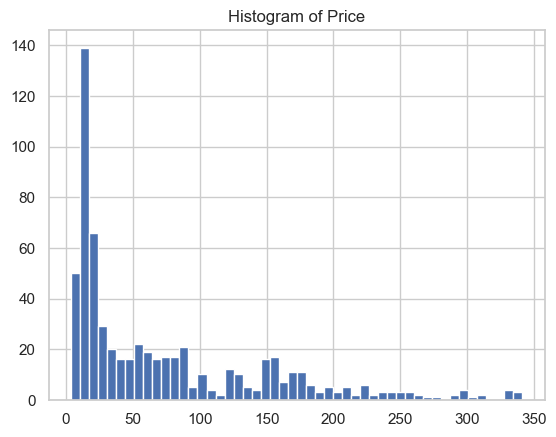

Skewness of Price: 1.3872701617752676
Kurtosis of Price: 1.3146630935321708
Shapiro-Wilk test statistics for Price: 0.8107340335845947, p-value: 1.8925830066605553e-26


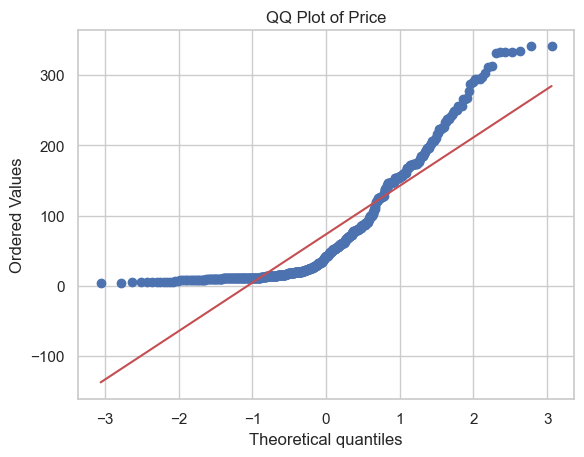

In [19]:
import scipy.stats as stats
import matplotlib.pyplot as plt

feature = 'Price'

# Histogram
plt.hist(data_no_outliers[feature], bins=50)
plt.title(f'Histogram of {feature}')
plt.show()

# Skewness and Kurtosis
print(f"Skewness of {feature}: {data_no_outliers[feature].skew()}")
print(f"Kurtosis of {feature}: {data_no_outliers[feature].kurt()}")

# Normality Test (Shapiro-Wilk)
shapiro_test = stats.shapiro(data_no_outliers[feature])
print(f"Shapiro-Wilk test statistics for {feature}: {shapiro_test[0]}, p-value: {shapiro_test[1]}")

# QQ Plot
stats.probplot(data_no_outliers[feature], dist="norm", plot=plt)
plt.title(f'QQ Plot of {feature}')
plt.show()


## Based on the skewness observed in the histograms and the Q-Q plots for "Reviews" and "Price", we will perform a log transformation to attempt to normalize these distributions, given that both show a right-skewed pattern.

In [21]:
import numpy as np
data_no_outliers = data_no_outliers.copy()
data_no_outliers['Log_Reviews'] = np.log(data_no_outliers['Reviews'])
data_no_outliers['Log_Price'] = np.log(data_no_outliers['Price'])

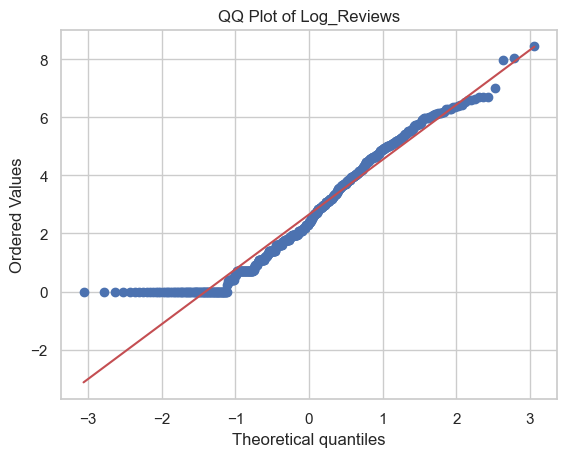

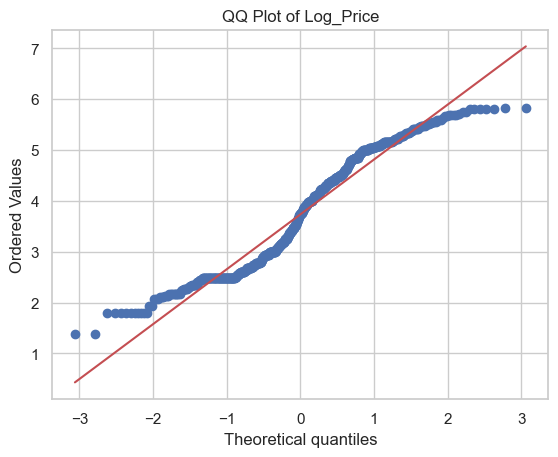

In [23]:
feature1 = 'Log_Reviews'
feature2 = 'Log_Price'

# QQ Plot
stats.probplot(data_no_outliers[feature1], dist="norm", plot=plt)
plt.title(f'QQ Plot of {feature1}')
plt.show()

stats.probplot(data_no_outliers[feature2], dist="norm", plot=plt)
plt.title(f'QQ Plot of {feature2}')
plt.show()

## Improved Model:
Build a regression model after performing a **Log Transformation** for features 'Price' and 'Reviews'.

In [25]:
formula1 = "Log_Price ~ EaseOfUse+Effective+Log_Reviews+Satisfaction"
model1 = ols(formula= formula1, data=data_no_outliers).fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_Price   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     16.61
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           6.11e-13
Time:                        13:59:41   Log-Likelihood:                -918.83
No. Observations:                 626   AIC:                             1848.
Df Residuals:                     621   BIC:                             1870.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.4542      0.205     16.818      0.000       3.051       3.858
EaseOfUse       -0.0712      0.065     -1.090      0.276      -0.199       0.057
Effective        0.1832      0.095      1.933      0.054      -0.003       0.369
Log_Reviews      0.1605      0.023      7.063      0.000       0.116       0.205
Satisfaction    -0.1604      0.086     -1.864      0.063      -0.329       0.009
==============================================================================
Omnibus:                      195.431   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.712
Skew:                           0.253   Prob(JB):                     1.07e-08
Kurtosis:                       1.927   Cond. No.                         34.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

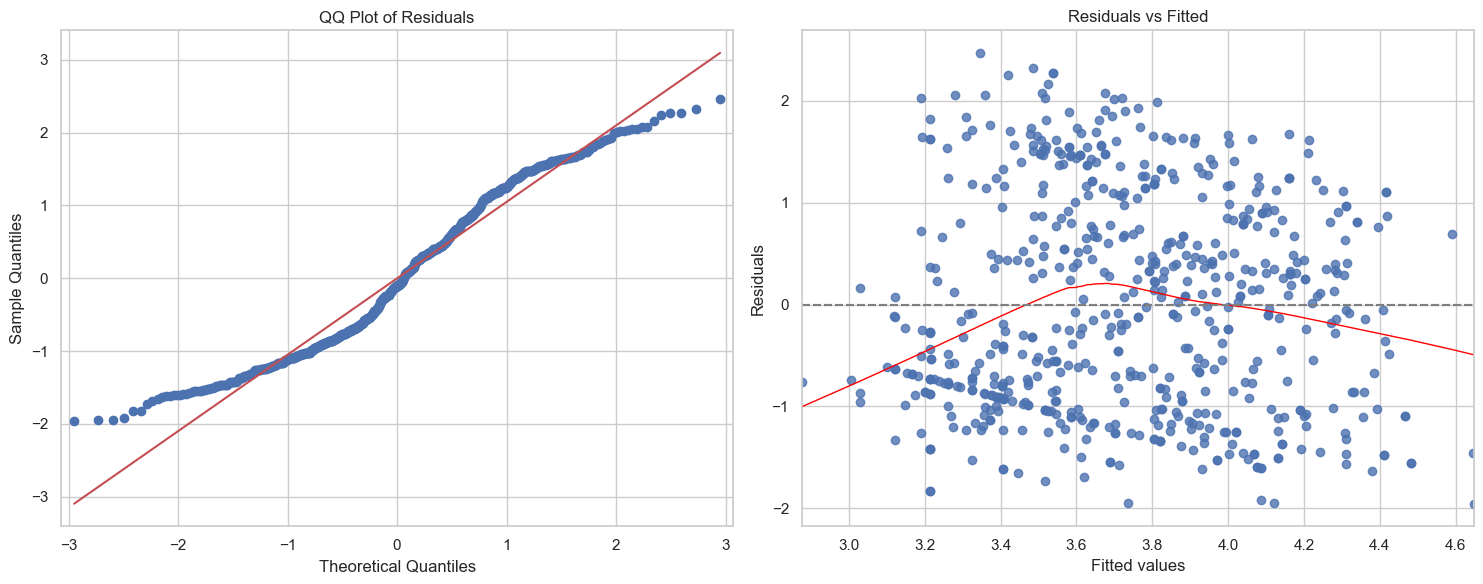

In [26]:
# Creating a QQ plot to check the normality of residuals
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sm.qqplot(model1.resid, line='s', ax=ax[0])
ax[0].set_title('QQ Plot of Residuals')

# Residuals vs Fitted values plot to check homoscedasticity
sns.residplot(x=model1.fittedvalues, y=model1.resid, lowess=True, ax=ax[1], line_kws={'color': 'red', 'lw': 1})
ax[1].set_title('Residuals vs Fitted')
ax[1].set_xlabel('Fitted values')
ax[1].set_ylabel('Residuals')

# Plotting the homoscedasticity trend line
ax[1].axhline(y=0, color='grey', linestyle='dashed')

# Show the plots
plt.tight_layout()
plt.show()

The updated OLS indicate an improvement in the model's fit after the log transformation of 'Price' and 'Reviews'. The Adjusted R-squared has increased, which suggests that the model is now explaining more of the variance in the log-transformed 'Price' than before. This is a positive sign that the transformations may have helped.

The correlation matrix also provides some insights. There are some strong correlations between 'EaseOfUse', 'Effective', and 'Satisfaction', which could indicate multicollinearity. However, the Condition Number itheur OLS results is not excessively high (34.7), which suggests that multicollinearity may not be as severe a problem as it could be.

Here are  and considerations based on the updated results:

1. **Effective**: The 'Effective' variable is still statistically significant, with a p-value less than 0.05, which suggests it has a significant relationship with 'Price'.

2. **Satisfaction**: The 'Satisfaction' variable has a p-value close to the threshold of 0.05. The negative coefficient is interesting, as it suggests that higher satisfaction is associated with a lower price. This counterintuitive result could be due to various factors, including the possibility that more expensive drugs have higher expectations and hence a tougher satisfaction threshold.

3. **Reviews**: After log transformation, 'Reviews' seems to have a stronger and now statistically significant relationship with 'Price'. This suggests that the number ofproxy for popularity or common use) is associated with price.

4. **Diagnostics**: The Omnibus test p-value is still very low, indicating that the residuals' distribution is not normal. The Jarque-Bera test also indicates non-normality. This could be a concern for the OLS.t modeling approach.t modeling approach.

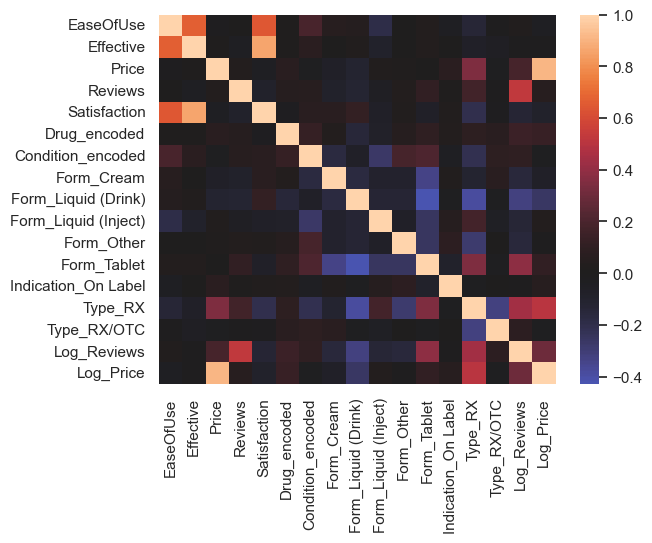

In [27]:
import seaborn as sns
sns.heatmap(data_no_outliers.corr(), center=0);

## Adding Variables:
The addition of 'Drug_encoded' and 'Condition_encoded' to the model has provided more explanatory variables which can offer a more detailed analysis of how different drugs and conditions might affect drug prices.

In [48]:
formula4 = "Log_Price ~ Effective + Log_Reviews + Satisfaction + Condition_encoded + Drug_encoded"
model4 = ols(formula= formula4, data=data_no_outliers).fit()

model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_Price   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     14.68
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           1.27e-13
Time:                        14:23:47   Log-Likelihood:                -915.62
No. Observations:                 626   AIC:                             1843.
Df Residuals:                     620   BIC:                             1870.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.2909      0.189     17.408      0.000       2.920       3.662
Effective             0.1481      0.091      1.628      0.104      -0.031       0.327
Log_Reviews           0.1558      0.023      6.829      0.000       0.111       0.201
Satisfaction         -0.1655      0.084     -1.964      0.050      -0.331    -1.4e-05
Condition_encoded    -0.0073      0.004     -1.768      0.077      -0.015       0.001
Drug_encoded          0.0007      0.000      2.298      0.022       0.000       0.001
==============================================================================
Omnibus:                      191.382   Durbin-Watson:                   1.273
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.909
Skew:                           0.261   Prob(JB):                     9.67e-09
Kurtosis:                       1.931   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
import statsmodels.api as sm

model = sm.OLS.from_formula('Log_Price ~ Effective + Log_Reviews + Satisfaction + Condition_encoded + Drug_encoded', data=data_no_outliers)
fitted_model = model.fit(cov_type='HC3')

# Print the summary of the model with robust standard errors
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     15.87
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           9.96e-15
Time:                        14:38:47   Log-Likelihood:                -915.62
No. Observations:                 626   AIC:                             1843.
Df Residuals:                     620   BIC:                             1870.
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.2909      0.18

## Estimated relationships between features and drug prices: 


**Effective**: This feature's influence on drug price isn't cleut based on the p-values frotheur earlier regression outputs. it may not have a statistically significant influence on drug pricel.
  
**Log_Reviews and  Drug_encoded** are statistically significant predictors of 'Log_Price'. This indicates that the number of reviews and the specific drug type have a significant impact on drug prices.

**Marginal Findings**: The influence of **Satisfaction** on drug price was borderline significant. This suggests that there might be an inverse relationship between satisfaction and price — perhaps higher satisfaction could be associated with slightly lower price, but this result is just suggestive but not conclusiven This could be due to various factors that may need further investigation.

**Condition_coded**: This reflects whether the condition a drug treats affects its price. If the p-value for this variable was significant, different conditions might lead to different pricing pattern.

**Drug_encoded**: This represents the specific drug identity. A significant p-value here suggests that different drugs (or types of drugs) have different prices, which is expected as different drugs serve different purposes and have different marketing.

Our analysis suggests that the number of reviews is positively associated with drug prices, and there is evidence that the specific type of drug has an impact o your results.

In [63]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

formula = 'Log_Price ~ Effective + Log_Reviews + Satisfaction + Condition_encoded + Drug_encoded'

train_data, test_data = train_test_split(data_no_outliers, test_size=0.2, random_state=42)

model4 = smf.ols(formula=formula, data=train_data).fit()

train_predictions = model4.predict(train_data)
test_predictions = model4.predict(test_data)

train_mse = ((train_data['Log_Price'] - train_predictions) ** 2).mean()
test_mse = ((test_data['Log_Price'] - test_predictions) ** 2).mean()

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

Train MSE: 1.0871121802634498
Test MSE: 1.1217267101636326


## Performing a train-test split and evaluating the model for overfitting or underfitting:

1. Loaded dataset.
2. Defined the model formula.
3. Split the data into training and testing sets.
4. Fitted the model on the training data.
5. Made predictions on both the training and testing sets.
6. Calculated the Mean Squared Error for both sets of predictions.
7. Printed the MSE values.

It seems like the model might be overfitting since the Train MSE is lower than the Test MSE. However, the values are very close, which is generally a good sign. 

### Compare these values to the range of dependent variable (Price):

In [65]:
log_price_range = data_no_outliers['Log_Price'].max() - data_no_outliers['Log_Price'].min()
print(f"Range of Log_Price: {log_price_range}")

Range of Log_Price: 4.445558790220428


In [66]:
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Train RMSE: 1.0426467188187232
Test RMSE: 1.059116004110802


In [67]:
log_price_mean = data_no_outliers['Log_Price'].mean()
print(f"Mean of Log_Price: {log_price_mean}")

Mean of Log_Price: 3.7344907159949914


In [68]:
proportion_train_rmse = train_rmse / log_price_mean
proportion_test_rmse = test_rmse / log_price_mean
print(f"Proportion of Train RMSE to Mean of Log_Price: {proportion_train_rmse}")
print(f"Proportion of Test RMSE to Mean of Log_Price: {proportion_test_rmse}")

Proportion of Train RMSE to Mean of Log_Price: 0.27919381733981036
Proportion of Test RMSE to Mean of Log_Price: 0.28360386586973174


## Model's results:

- The **range** of `Log_Price` The highest log price is about 4.45 units more than the lowest log price in your dataset.
- The **Root Mean Squared Error (RMSE)** tells us how much the model's predictions typically deviate from the actual prices (after taking the logarithm). For the training set, this deviation is about 1.04, and for the testing set, it's about 1.05. Since these numbers are close to each other, it means the model is consistent; it doesn't do much better or worse on new data it hasn't seen before.
- When comparing the RMSE to the **mean** of `Log_Price`, which is about 3.74, the RMSE is roughly 28% of this mean value. On average, the model's predictions are off by about 28% from the typical log price in the data.
- Whether a 28% deviation is okay depends on what we need the model for. If we are using it to get a general idea of drug prices, that might be fine. But if we need very precise predictions, the model needs more improvement to make this percentage lower.

The model is pretty consistent but has an average error margin of 28%. Depending on what we need the model for, this error might be okay, or we could try to make it more accurate.

## Limitations of the analysis:

1. The dataset may not capture all relevant factors that influence drug prices. The dataset is limited to the variables provided and may not reflect the full complexity of the pharmaceutical market.

2. The conclusions drawn from this analysis apply to the context of the data used. Applying these findings to different contexts or extrapolating beyond the scope of the data requires caution.

3. The model’s predictive performance, as measured by metrics like MSE or RMSE, did not meet the thresholds set for desired accuracy. This could be due to model oversimplification, overfitting, or underfitting.